# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Nur Abdi Sabda Sabir
- **Email:** nurabdi1323@gmail.com
- **ID Dicoding:** abdi_08

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : berapa banyak sepeda yang disewa di setiap musimnya
- Pertanyaan 2 : cuaca apa yang digemari para pengguna untuk bersepeda

# Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np # import numpy sebagai np
import pandas as pd  # import pandas sebagai pd
import matplotlib.pyplot as plt # import mathlotlib sebagai plt
import seaborn as sns # import seaborn sebagai sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling

### Gathering Data

In [ ]:
# Memanggil Dokumen hour.csv --> Hour_df
Hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DriveSaya/hour.csv")
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Memanggil Dokumen day.csv --> Day_df
Day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DriveSaya/day.csv")
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Assessing Data

### Assering Data --> Hour_df

In [ ]:
Hour_df.info() # memeriksa tipe data dari setiap column Hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah Duplikasi --> ", Hour_df.duplicated().sum())  # Menghitung jumlah duplikat yang berada di Hour_df
Hour_df.describe() # Menampilkan parameter statistik

Jumlah Duplikasi -->  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
Hour_df.isna().sum() # menampilkan jumlah missing value di setiap column

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Assering Data --> Day df

---



In [ ]:
Day_df.info() # Memeriksa Tipe Data di setiap Column Day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi -->", Day_df.duplicated().sum()) # menampilkan Jumlah Duplikat yang berasal dari Day_df
Day_df.describe() # Menampilkan parameter statistik seperti Mean, std , min, dll --> Day_df

Jumlah duplikasi --> 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
Day_df.isna().sum() # Menampilkan semua Missing Value di setiap Column

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


## Cleaning Data

### Cleaning Data --> Hour_df

In [ ]:
Hour_df['dteday'] = pd.to_datetime(Hour_df['dteday']) # Mengubah dteday menjadi Datetime

In [ ]:
new_season = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'} # Mendeklarasi dan Mengnisialisai 'new_season'
Hour_df['season'] = Hour_df['season'].map(new_season) # Mengubah nilai 'sesason' Hour_df berdasarkan 'new_season'

In [ ]:
new_year = {0: 2011, 1: 2012} # Mendeklarasi dan Mengnisialisai new_year
Hour_df['yr'] = Hour_df['yr'].map(new_year) # Mengubah nilai 'yr' Hour_df berdasarkan 'new_year'

In [ ]:
new_month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'} # Mendeklarasi dan Mengnisialisai new_year
Hour_df['mnth'] = Hour_df['mnth'].map(new_month) # Mengubah nilai 'mnth' Hour_df berdasarkan 'new_month'

In [ ]:
weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'} # Mendeklarasi dan Mengnisialisai weekdays
Hour_df['weekday'] = Hour_df['weekday'].map(weekdays) # Mengubah nilai 'weekday' Hour_df berdasarkan  'weekdays'

In [ ]:
# Mendeklarasi dan Menginisialisai Weathershit
Weathersit = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
Hour_df['weathersit'] = Hour_df['weathersit'].map(Weathersit) # Mengubah nilai 'mnth' Hour_df berdasarkan Weathersit'

In [ ]:
Hour_df['temp'] = Hour_df['temp'] * 41
Hour_df['atemp'] = Hour_df['atemp'] * 50
Hour_df['hum'] = Hour_df['hum'] * 100
Hour_df['windspeed'] = Hour_df['windspeed'] * 67

In [ ]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
Hour_df.describe()

,instant,dteday,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.028770,0.682721,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,6.000000,0.000000,0.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,12.000000,0.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,18.000000,0.000000,1.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,5017.0295,NaN,0.500008,6.914405,0.167165,0.465431,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599


In [ ]:
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,0,Saturday,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.84,14.395,75.0,0.0,0,1,1


### Cleaning Data --> Day_df

In [ ]:
Day_df['dteday'] = pd.to_datetime(Day_df['dteday']) # Mengubah dteday Day_df ke DateTime

In [ ]:
Day_df['season'] = Day_df['season'].map(new_season) # Menyesuaikan nilai 'season' Hour_df berdasarkan 'new_season'

In [ ]:
Day_df['yr'] = Day_df['yr'].map(new_year) # Menyesuaikan nilai 'yr' Hour_df berdasarkan 'new_year'

In [ ]:
Day_df['mnth'] = Day_df['mnth'].map(new_month) # Menyesuaikan nilai 'mnth' Hour_df berdasarkan 'new_month'

In [ ]:
Day_df['weekday'] = Day_df['weekday'].map(weekdays) # Menyesuaikan nilai 'weekday' Hour_df berdasarkan 'weekdays'

In [ ]:
Day_df['weathersit'] = Day_df['weathersit'].map(Weathersit) # Menyesuaikan nilai 'weathersit' Hour_df berdasarkan 'Weathersit'

In [ ]:
Day_df['temp'] = Day_df['temp'] * 41
Day_df['atemp'] = Day_df['atemp'] * 50
Day_df['hum'] = Day_df['hum'] * 100
Day_df['windspeed'] = Day_df['windspeed'] * 67

In [ ]:
Day_df.describe()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,0.028728,0.683995,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,0.000000,0.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,0.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,0.000000,1.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.167155,0.465233,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [ ]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,January,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,spring,2011,January,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,spring,2011,January,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis (EDA)

## Explore ...

In [ ]:
# Merge left Hour_df dan Day_df
All_df = pd.merge(
    left=Hour_df,
    right=Day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)

All_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday_x      17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  object        
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  object        
 5   hr            17379 non-null  int64         
 6   holiday_x     17379 non-null  int64         
 7   weekday_x     17379 non-null  object        
 8   workingday_x  17379 non-null  int64         
 9   weathersit_x  17379 non-null  object        
 10  temp_x        17379 non-null  float64       
 11  atemp_x       17379 non-null  float64       
 12  hum_x         17379 non-null  float64       
 13  windspeed_x   17379 non-null  float64       
 14  casual_x      17379 non-null  int64         
 15  registered_x  17379 non-null  int64 

In [ ]:
All_df.to_csv("All_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
Musim_Terbanyak_df = All_df.groupby(['season_x']).agg({
    'cnt_x': 'sum'
}).reset_index()

Musim_Terbanyak_df.columns = ['Season', 'Jumlah']

Season_Rental = Musim_Terbanyak_df.groupby('Season')['Jumlah'].sum()

In [ ]:
Season_Rental.head()

,Jumlah
Season,
fall,1061129
spring,471348
summer,918589
winter,841613


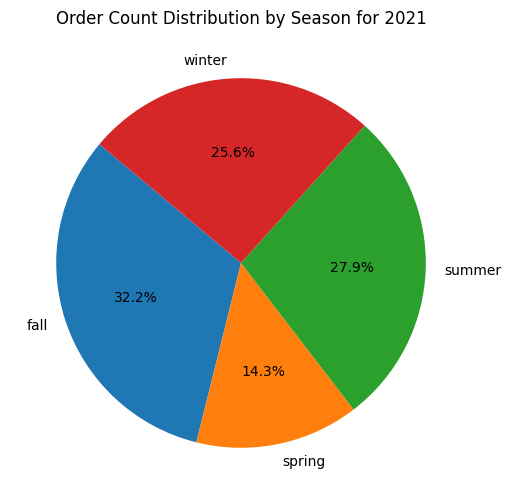

In [ ]:
# Membuat Pie Chart
plt.figure(figsize=(12, 6))
plt.pie(Season_Rental, labels=Season_Rental.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Count Distribution by Season for 2021')
plt.show()

### Pertanyaan 2:

In [ ]:
Cuaca_Mendukung_df = All_df.groupby(['weathersit_x']).agg({
    'cnt_x': 'sum'
}).reset_index()

Cuaca_Mendukung_df.columns = ['Cuaca', 'Total_Sewa']

Cuaca_count = Cuaca_Mendukung_df.groupby('Cuaca')['Total_Sewa'].sum()



In [ ]:
Cuaca_count.head()

,Jumlah Pengunjung
Cuaca,
"Clear, Few clouds, Partly cloudy, Partly cloudy",11413
"Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog",3
"Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",1419
"Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",4544


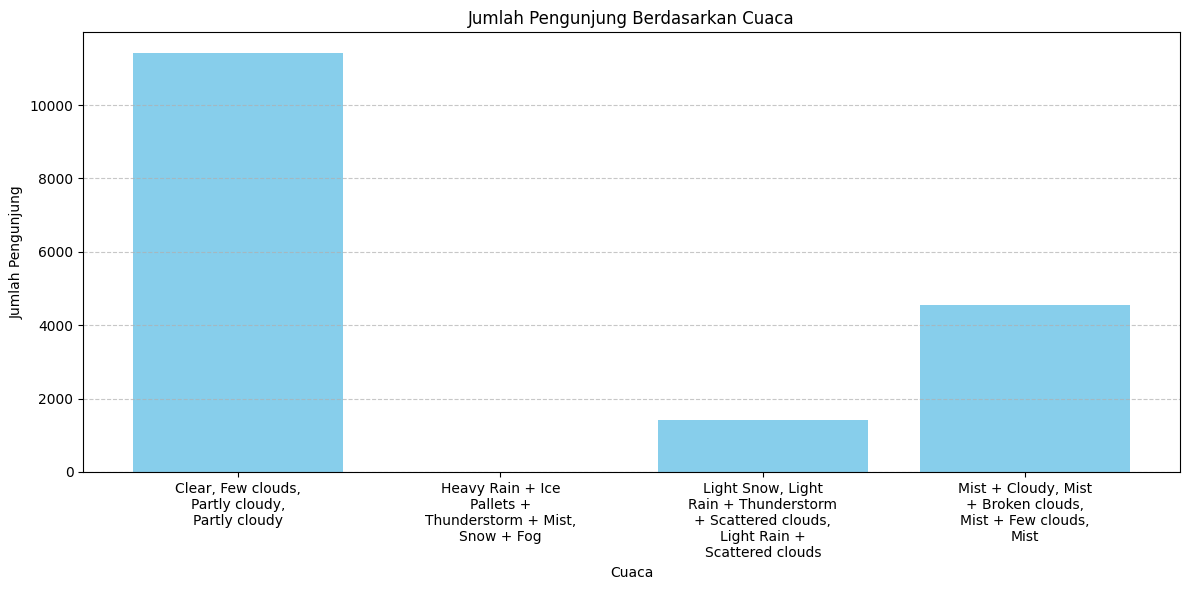

In [ ]:
import textwrap
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrapping labels
wrapped_labels = wrap_labels(Cuaca_count.index, 20)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(wrapped_labels, Cuaca_count, color='skyblue')
plt.title('Jumlah Pengunjung Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Pengunjung')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Conclusion

### - Conclution pertanyaan 1 :
Berdasarkan Hasil di atas bisa disimpulkan sepeda yang disewa paling banyak berada saat **musim Gugur, yakni (32,2%)** Kemudian disusul **Musim Panas, sebesar (27,9%)**, selanjutnya **Musim Dingin, Sebesar (25,6%)** dan **Musim Semi, Sebesar (14,3%)**

### - Conclution pertanyaan 2:
Berdasarkan hasil di atas bisa disimpulkan bahwa pengguna yang menyewa sepeda lebih banyak berada di Cuaca **Clear, Few clouds, Partly cloudy, Partly cloudy**